In [1]:
# Import my data

import pandas as pd
import numpy as np

df = pd.read_csv('/content/accident.csv')

In [2]:
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [3]:
# Descriptive Statistics

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              200 non-null    int64  
 1   Gender           199 non-null    object 
 2   Speed_of_Impact  197 non-null    float64
 3   Helmet_Used      200 non-null    object 
 4   Seatbelt_Used    200 non-null    object 
 5   Survived         200 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 9.5+ KB


In [4]:
df.isnull().sum() # missing values

,0
Age,0
Gender,1
Speed_of_Impact,3
Helmet_Used,0
Seatbelt_Used,0
Survived,0


In [5]:
# Cardinality of the features

df.nunique()

,0
Age,51
Gender,2
Speed_of_Impact,80
Helmet_Used,2
Seatbelt_Used,2
Survived,2


In [8]:
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,Female,27.0,No,No,1
1,69,Female,46.0,No,Yes,1
2,46,Male,46.0,Yes,Yes,0
3,32,Male,117.0,No,Yes,0
4,60,Female,40.0,Yes,Yes,0


In [10]:
# Manual encoding

df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0) # 1 - Male and 0 - Female & Missing
df['Helmet_Used'] = df['Helmet_Used'].apply(lambda x: 1 if x == 'Yes'
                                                        else 0) # 1 - Yes  and 0 - Female
df['Seatbelt_Used'] = df['Seatbelt_Used'].apply(lambda x: 1 if x == 'Yes'
                                                        else 0) # 1 - Yes and 0 - Female

In [11]:
df.head()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
0,56,0,27.0,0,0,1
1,69,0,46.0,0,1,1
2,46,1,46.0,1,1,0
3,32,1,117.0,0,1,0
4,60,0,40.0,1,1,0


<Axes: >

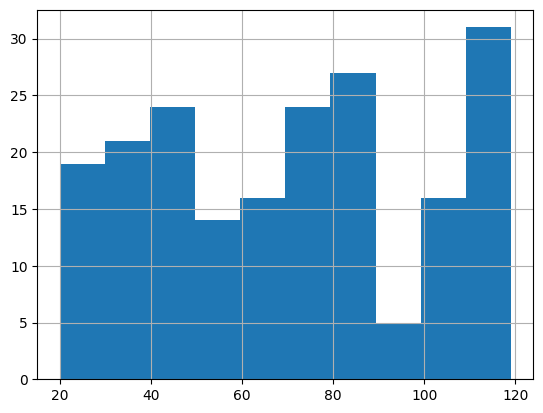

In [12]:
df.Speed_of_Impact.hist() # histogram of Speed of Impact

In [13]:
# Descriptive stats

df.describe()

,Age,Gender,Speed_of_Impact,Helmet_Used,Seatbelt_Used,Survived
count,200.00000,200.000000,197.000000,200.000000,200.000000,200.00000
mean,43.42500,0.445000,70.441624,0.555000,0.555000,0.50500
std,14.94191,0.498213,30.125298,0.498213,0.498213,0.50123
min,18.00000,0.000000,20.000000,0.000000,0.000000,0.00000
25%,31.00000,0.000000,43.000000,0.000000,0.000000,0.00000
50%,43.50000,0.000000,71.000000,1.000000,1.000000,1.00000
75%,56.00000,1.000000,95.000000,1.000000,1.000000,1.00000
max,69.00000,1.000000,119.000000,1.000000,1.000000,1.00000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'Speed_of_Impact'}>,
        <Axes: title={'center': 'Helmet_Used'}>],
       [<Axes: title={'center': 'Seatbelt_Used'}>,
        <Axes: title={'center': 'Survived'}>]], dtype=object)

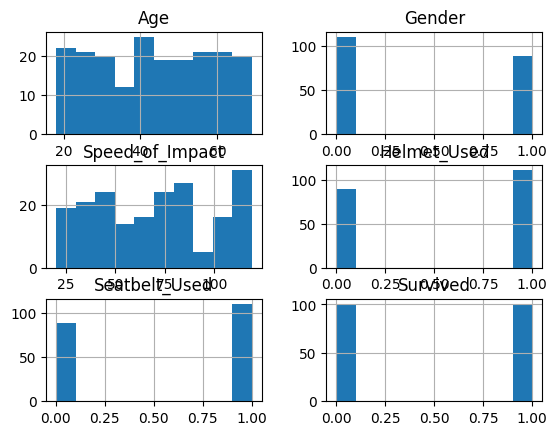

In [14]:
# Histogram of entire data

# Histogram
df.hist()

In [18]:
median_speed = df['Speed_of_Impact'].median()
df['Speed_of_Impact'].fillna(median_speed, inplace=True)

<ipython-input-18-c19e3ff95064>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Speed_of_Impact'].fillna(median_speed, inplace=True)


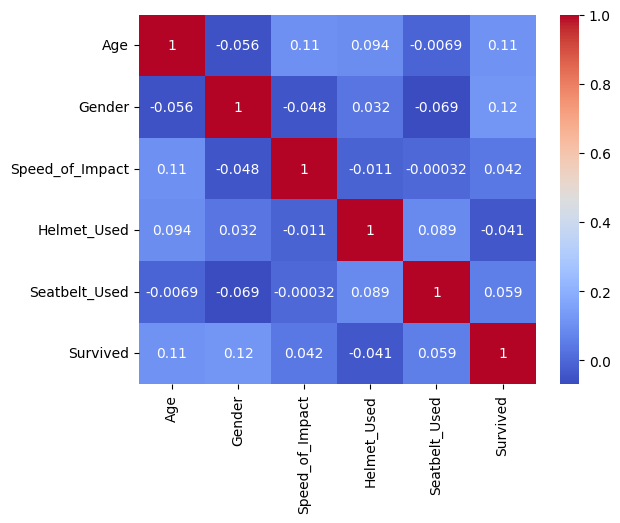

In [20]:
# Correlation heatmap

# correlation in data and plot with seaborn
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.select_dtypes(include='number').corr()
# Create the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [19]:
df.isnull().sum()

,0
Age,0
Gender,0
Speed_of_Impact,0
Helmet_Used,0
Seatbelt_Used,0
Survived,0


In [21]:
# Check for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i)
                   for i in range(df.shape[1])]
print("\nVIF Scores:")
print(vif_data)


VIF Scores:
           Feature       VIF
0              Age  6.052923
1           Gender  1.722887
2  Speed_of_Impact  4.960114
3      Helmet_Used  2.223023
4    Seatbelt_Used  2.128593
5         Survived  2.076850


In [22]:
df.columns

Index(['Age', 'Gender', 'Speed_of_Impact', 'Helmet_Used', 'Seatbelt_Used',
       'Survived'],
      dtype='object')

In [23]:
# Train Test split
from sklearn.model_selection import train_test_split

X = df[df.columns.difference(['Survived'])]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Accuracy score - Train and test
accuracy_train = accuracy_score(y_train, train_pred)
accuracy_test = accuracy_score(y_test, test_pred)
print('Accuracy Metric - ', accuracy_train, accuracy_test)

# Precision score - Train and test
precision_train = precision_score(y_train, train_pred)
precision_test = precision_score(y_test, test_pred)
print('Precision Metric - ', precision_train, precision_test)

# Recall score - Train and test
recall_train = recall_score(y_train, train_pred)
recall_test = recall_score(y_test, test_pred)
print('Recall Metric - ', recall_train, recall_test)

# F1 score - Train and test
f1_train = f1_score(y_train, train_pred)
f1_test = f1_score(y_test, test_pred)
print('F1 Score Metric - ', f1_train, f1_test)

# ROC score - Train and test
roc_train = roc_auc_score(y_train, train_pred)
roc_test = roc_auc_score(y_test, test_pred)
print('ROC Score Metric - ', roc_train, roc_test)

Accuracy Metric -  0.5625 0.55
Precision Metric -  0.5747126436781609 0.5
Recall Metric -  0.6024096385542169 0.3888888888888889
F1 Score Metric -  0.5882352941176471 0.4375
ROC Score Metric -  0.5609450790173681 0.5353535353535354


In [26]:
model.coef_

array([[ 0.01109326,  0.66030792, -0.25201971,  0.2282855 , -0.00105052]])

In [27]:
# Using Stats model - Logistic Regression

import statsmodels.api as sm

X = sm.add_constant(X_train)
y = y_train
model = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.672620
         Iterations 4


In [28]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  160
Model:                          Logit   Df Residuals:                      154
Method:                           MLE   Df Model:                            5
Date:                Tue, 04 Feb 2025   Pseudo R-squ.:                 0.02863
Time:                        02:08:16   Log-Likelihood:                -107.62
converged:                       True   LL-Null:                       -110.79
Covariance Type:            nonrobust   LLR p-value:                    0.2742
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.7177      0.706     -1.017      0.309      -2.101       0.665
Age                 0.0116      0.011      1.049      0.294      -0.010       0.033
Gender              0.7376      

In [29]:
np.exp(0.2683)

1.3077394029934453

In [30]:
(1.3077394 - 1)*100

30.77394

In [36]:
train_pred.shape, test_pred.shape

((160,), (40,))

          Predicted_0  Predicted_1
Actual_0           40           37
Actual_1           33           50


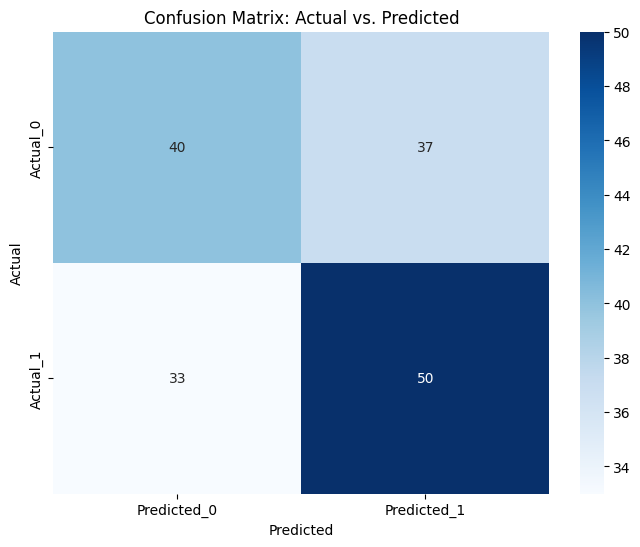

In [38]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix_train = confusion_matrix(y_train, train_pred)

# Convert confusion matrix to DataFrame for better readability
conf_matrix_df = pd.DataFrame(conf_matrix_train, index=['Actual_0', 'Actual_1'], columns=['Predicted_0', 'Predicted_1'])

# Display the confusion matrix
print(conf_matrix_df)

# Optional: Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Actual vs. Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

          Predicted_0  Predicted_1
Actual_0           15            7
Actual_1           11            7


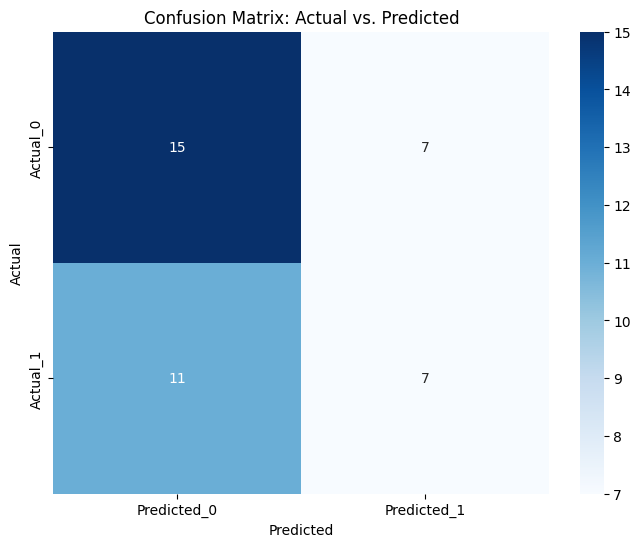

In [39]:
# Confusion Matrix - Test

from sklearn.metrics import confusion_matrix

# Create a confusion matrix
conf_matrix_test = confusion_matrix(y_test, test_pred)

# Convert confusion matrix to DataFrame for better readability
conf_matrix_df = pd.DataFrame(conf_matrix_test, index=['Actual_0', 'Actual_1'], columns=['Predicted_0', 'Predicted_1'])

# Display the confusion matrix
print(conf_matrix_df)

# Optional: Visualize the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Actual vs. Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()